# Shopify Data Science Challenge

By Shahbaz Naziri

## Imports

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

In [156]:
#Importing the data set
raw_dataSet= pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

## Analyzing the data

In [157]:
# Checking out the raw data
raw_dataSet

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [158]:
# Checking out some statistics of the data
raw_dataSet.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The max of order_amount is $704000. This seems really high for regular orders, especially knowing that the items in question are sneakers. Need to investigate deeper into the data.

In [159]:
# Investigating the unusually high order amount
raw_dataSet[raw_dataSet['order_amount']==704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


There are quite a few entries with the same amount, customer id and total items. These orders are likely skewing the mean towards a higher value. There are multiple possibilities here. This could be a wholesale buyer routinely purchasing stock. All the orders are placed at the same time of the day each day - this is systematic. This may even be a bot.

In [160]:
# Checking for non values
nan_rows = raw_dataSet[raw_dataSet.order_amount.isna()]
nan_rows.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


There are no null values.

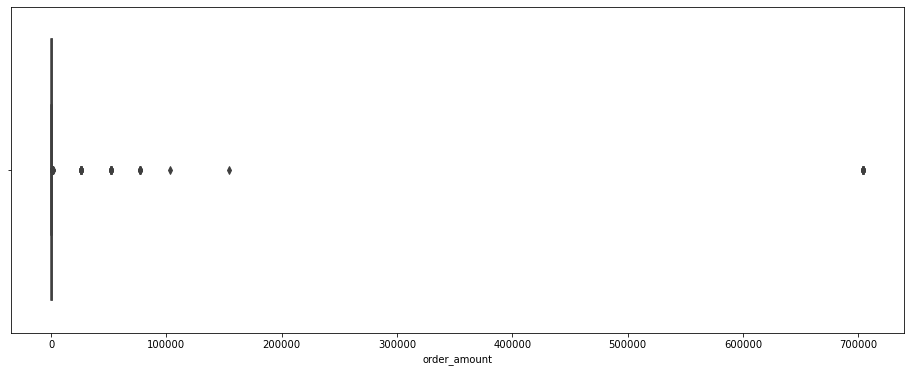

In [161]:
# Finding more outliers in the data
plt.figure(figsize=(16, 6))
sns.boxplot(x=raw_dataSet['order_amount'])

Boxplot shows that there are several orders that are outside the box (outliers). From this boxplot, it can be seen that a majority of the values are clustered together and a few really high values are greatly increasing the spread. 


## Cleaning Data

In [162]:
# Finding the quartiles
Q1 = raw_dataSet['order_amount'].quantile(0.25)
Q3 = raw_dataSet['order_amount'].quantile(0.75)
print(f'Q1={Q1}, Q3={Q3}')

Q1=163.0, Q3=390.0


In [163]:
#Finding the interquartile range(IQR)
iqr = Q3-Q1
print(f'IQR = {iqr}')

IQR = 227.0


In [164]:
#Excluding outliers from the dataset
clean_df = raw_dataSet[raw_dataSet['order_amount'] <= (Q3 + 1.5*iqr)]

In [165]:
clean_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


This data makes more sense with regards to shoe sales. The mean and standard deviation are more likely than what was previously calculated. Only 141 entries, out of 5000, were greatly increasing the variance and the mean.

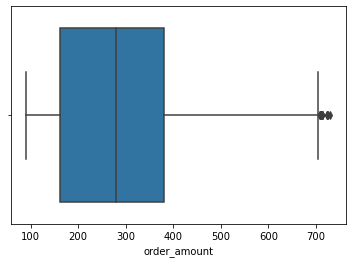

In [166]:
sns.boxplot(x=clean_df['order_amount'])

This is a box plot of the clean data. This makes more reasonable with sneakers in mind.

## Alternative solutions/ Further exploration

### Categorization Approach

Another approach could be trying to understand the type of buyer. For a single type of sneakers, it is likely that any order greater than 10 items can be a wholesaler. With this assumption, we will categorize each order as 'retail' or 'wholesale'

In [167]:
categorized_data = raw_dataSet
categorized_data['category'] = np.where(categorized_data['total_items']<10,'retail','wholesale')
categorized_data.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,category
0,1,53,746,224,2,cash,2017-03-13 12:36:56,retail
1,2,92,925,90,1,cash,2017-03-03 17:38:52,retail


In [168]:
categorized_data.groupby('category').mean()

,order_id,shop_id,user_id,order_amount,total_items
category,,,,,
retail,2501.060405,50.106362,849.918322,754.091913,1.99398
wholesale,2336.235294,42.000000,607.000000,704000.000000,2000.00000


only the CAD704000 orders are removed. Much larger orders are still present in the data. The average retail order mean is CAD754.

### Trend Exploration

Exploring the relationship between number of items and order amout.

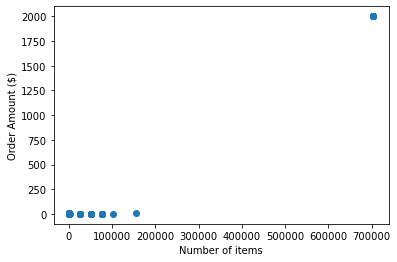

In [169]:
plt.ylabel('Order Amount ($)')
plt.xlabel('Number of items')

plt.scatter(categorized_data['order_amount'],categorized_data['total_items'])

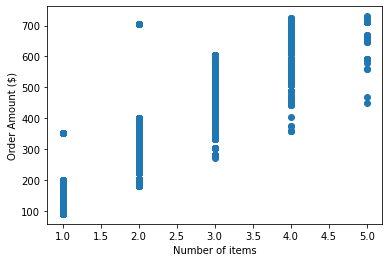

In [170]:
plt.ylabel('Order Amount ($)')
plt.xlabel('Number of items')


plt.scatter(clean_df['total_items'],clean_df['order_amount'])

Further exploring this trend. Checking out the difference in per unit price with total items.

In [171]:
unit_data = clean_df
unit_data['unit price'] = clean_df['order_amount']/clean_df['total_items']
unit_data.head(2)

<ipython-input-171-e6e245f74b4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_data['unit price'] = clean_df['order_amount']/clean_df['total_items']


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0


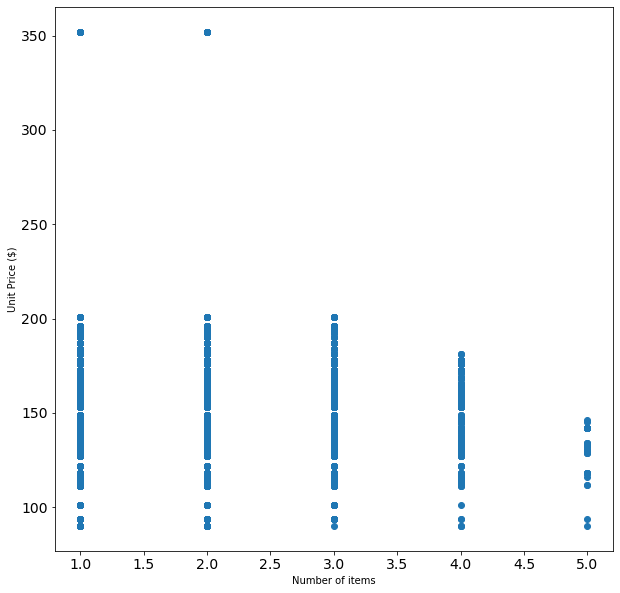

In [172]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit Price ($)')
plt.xlabel('Number of items')

plt.scatter(clean_df['total_items'],clean_df['unit price'])

There are no apparent trends.

### 95% Technique

95% data points are within 2 times the standard deviation of the mean. this will remove the 5% outliers that fall outside.

In [173]:
amount_mean = raw_dataSet['order_amount'].mean()
amount_std = raw_dataSet['order_amount'].std()
cutoff_value_high = amount_mean + 2*amount_std
cutoff_value_high

85710.20669757639

In [174]:
percentile_cleaned_data = raw_dataSet[raw_dataSet['order_amount'] < cutoff_value_high]

In [175]:
percentile_cleaned_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,2501.425216,50.095162,849.915880,702.748444,1.992773
std,1443.152284,29.052172,86.816531,4627.726634,0.981326
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1251.000000,24.000000,776.000000,163.000000,1.000000
50%,2503.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,75.000000,925.000000,390.000000,3.000000
max,5000.000000,100.000000,999.000000,77175.000000,8.000000


With this method, the mean is 702 CAD and a standard deviation than 4627 CAD. This is more reasonable than the original evaluation of the mean. Additionally, the median still yields a similar result as the original.

### Histogram

(array([4.972e+03, 1.000e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01]),
 array([9.00000e+01, 7.04810e+04, 1.40872e+05, 2.11263e+05, 2.81654e+05,
        3.52045e+05, 4.22436e+05, 4.92827e+05, 5.63218e+05, 6.33609e+05,
        7.04000e+05]),
 <a list of 10 Patch objects>)

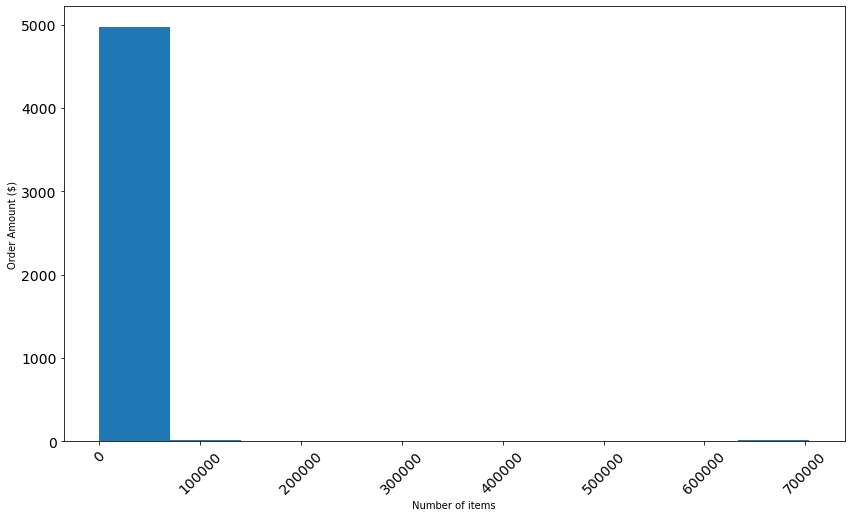

In [176]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Order Amount ($)')
plt.xlabel('Number of items')

plt.hist(raw_dataSet['order_amount'])

(array([948., 902., 587., 854., 594., 303., 364., 149.,  84.,  74.]),
 array([ 90., 154., 218., 282., 346., 410., 474., 538., 602., 666., 730.]),
 <a list of 10 Patch objects>)

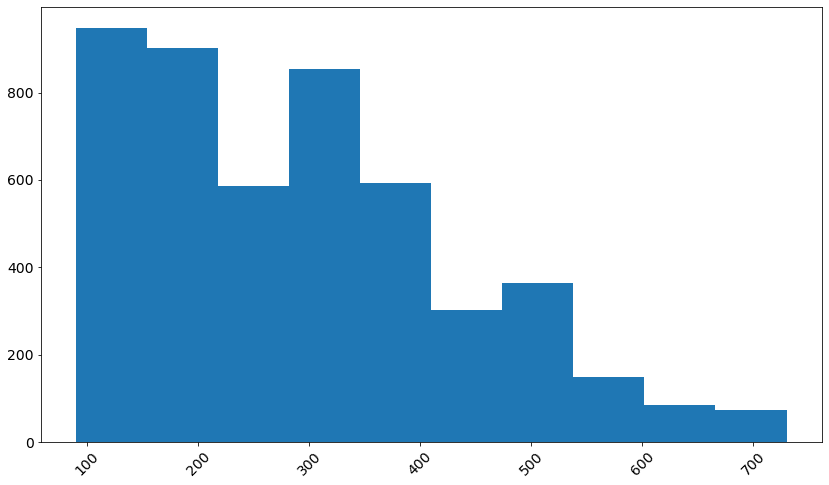

In [177]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.hist(clean_df['order_amount'])

(array([4937.,    0.,    0.,   19.,    0.,    0.,   16.,    0.,    0.,
           9.]),
 array([   90. ,  7798.5, 15507. , 23215.5, 30924. , 38632.5, 46341. ,
        54049.5, 61758. , 69466.5, 77175. ]),
 <a list of 10 Patch objects>)

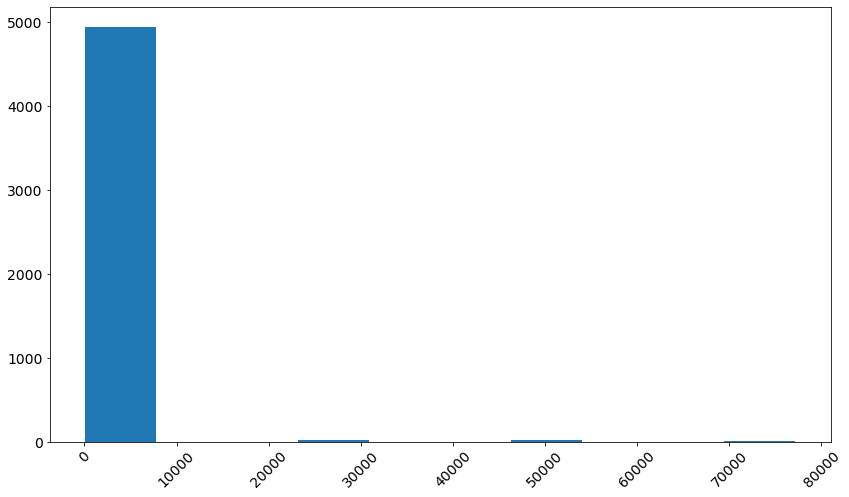

In [178]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)


plt.hist(percentile_cleaned_data['order_amount'])

### Time Series

In [179]:
time_series_data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [180]:
time_series_data['created_at'] = pd.to_datetime(time_series_data.created_at).dt.date
time_series_data.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13
1,2,92,925,90,1,cash,2017-03-03


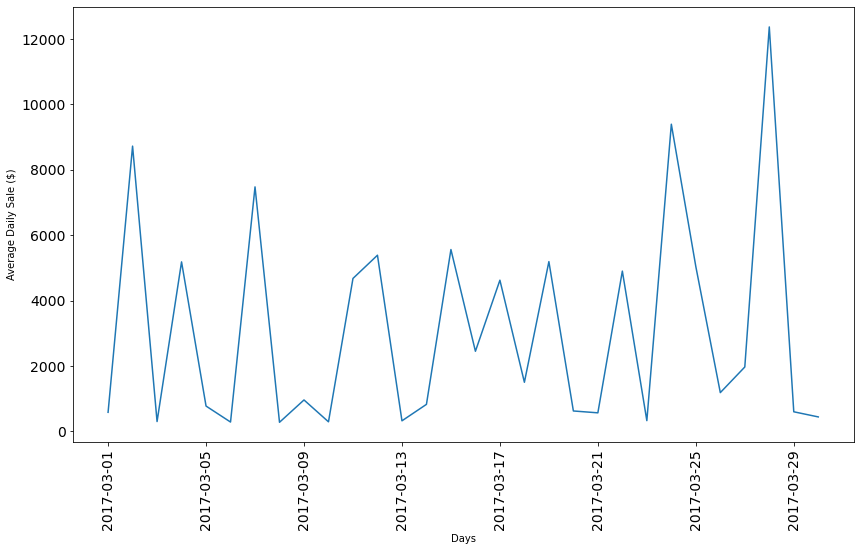

In [181]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Average Daily Sale ($)')
plt.xlabel('Days')

plt.plot(time_series_data['order_amount'].groupby(time_series_data.created_at).mean().index,time_series_data['order_amount'].groupby(time_series_data.created_at).mean())


This graph is a timeseries of the mean of the daily sale. The sale amounts seem to be fluctuating greatly on a day-to-day basis. The peaks may be caused by the wholesale/bot orders discussed earlier. 

In [185]:
days_of_week_data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [189]:
days_of_week_data.created_at = pd.to_datetime(time_series_data.created_at).dt.strftime('%A')

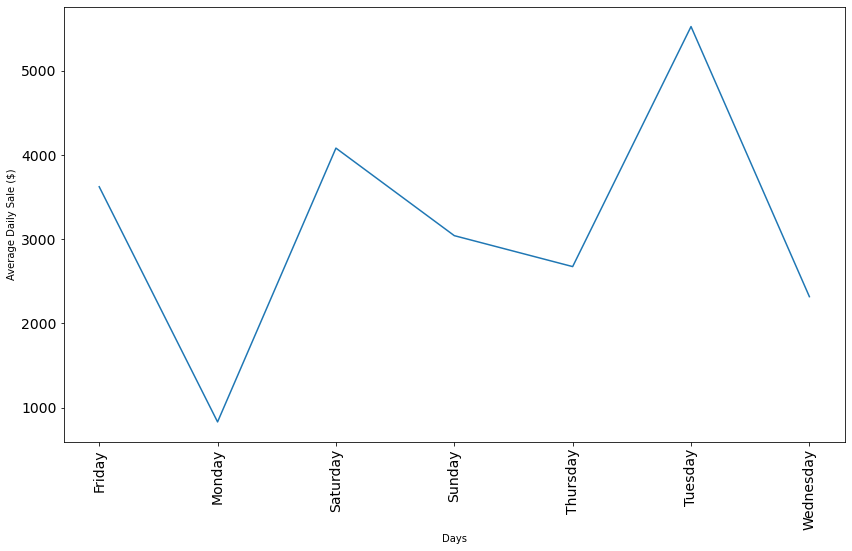

In [184]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Average Daily Sale ($)')
plt.xlabel('Days')

plt.plot(days_of_week_data.order_amount.groupby(days_of_week_data.created_at).mean().index,days_of_week_data.order_amount.groupby(days_of_week_data.created_at).mean())


The highest average sales seem to happen on tuesdays. The lowest occurs on Monday.